In [1]:
# 1.	Load the basic libraries and packages

import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [17]:
# 2.	Load the dataset

# URL of the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# Column names
names = ["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width", "Class"]
# Loading the dataset
dataset = pd.read_csv(url, names=names)


In [19]:
# 3.	Analyse the dataset

dataset.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [20]:
# 4.	Pre-process the data

# Extract the 'Class' column as the target variable
traningclass = dataset.values[:, -1]
# Get unique class names and assign numeric labels
unique_list = list(set(traningclass))

# Encoding classes as numbers
for i in range(len(traningclass)):
    for j in range(len(unique_list)):
        if traningclass[i] == unique_list[j]:
            traningclass[i] = j

# Remove the last element if it's a separate testing example
traningclass = traningclass[:-1]

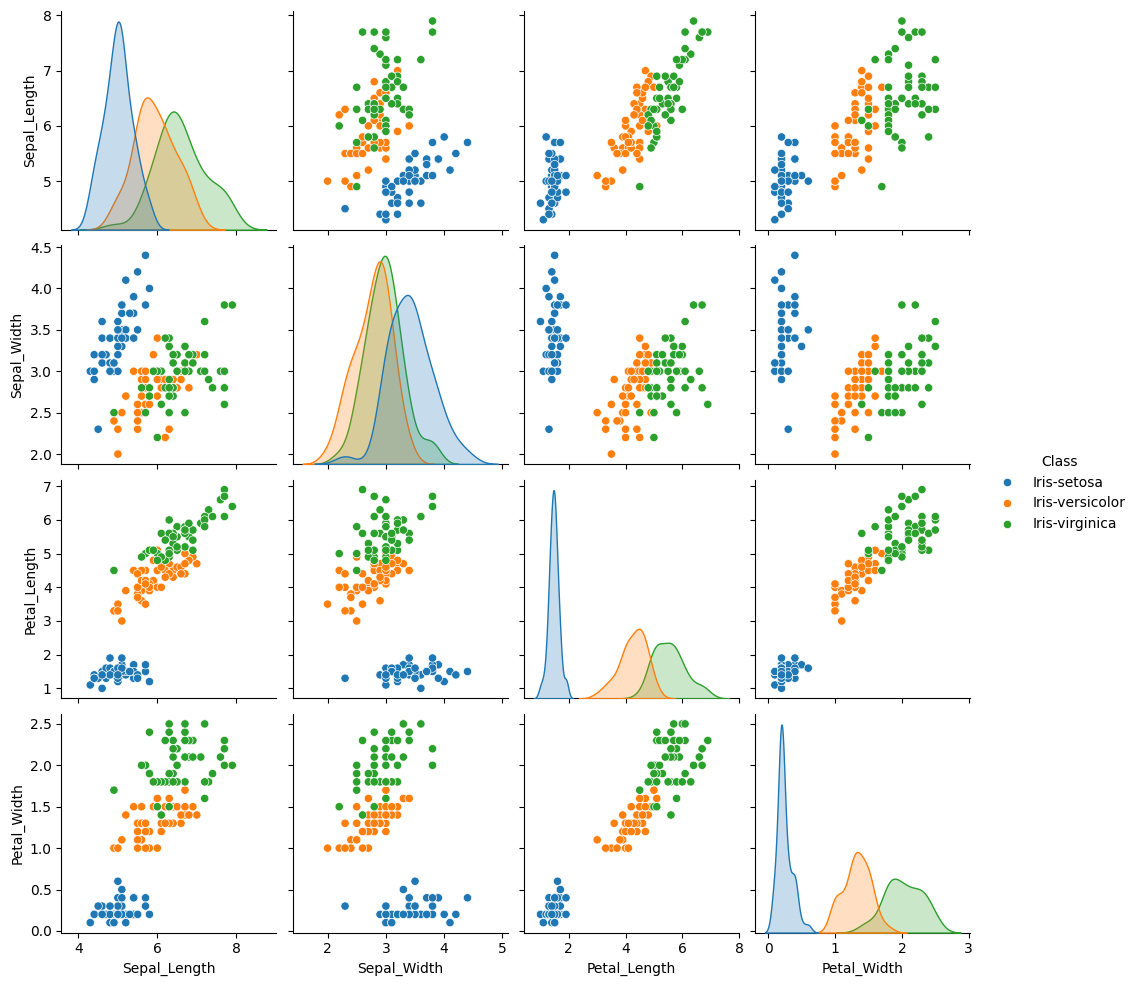

In [21]:
# 5.	Visualize the Data

# Pairplot to visualize relationships
sns.pairplot(dataset, hue="Class")
plt.show()

In [22]:
# 6.	Separate the feature and prediction value columns

# Separate the features and target variable
training = dataset.values[:, :-1]  # All feature columns
testing = dataset.values[149, :-1]  # Using the last row as the test sample
training = dataset.values[:149, :-1]  # Training set (excluding the last row)


In [23]:
# 7.	Select the number K of the neighbors

# Define the number of neighbors
k = 25

In [24]:
# 8.	Calculate the Euclidean distance of K number of neighbors

# Function to calculate Euclidean distance
def Euclidean_Distance(row_i, row_j):
    distance = 0.0
    for i in range(len(row_i)):
        distance += (row_i[i] - row_j[i])**2
    return np.sqrt(distance)

# Calculate distances between the test sample and each training sample
distance = []
for i in range(len(training)):
    dist = Euclidean_Distance(training[i], testing)
    distance.append([dist, traningclass[i]])

In [25]:
# 9.	Take the K nearest neighbors as per the calculated Euclidean distance.

# Sort the distances and select the first k
distance.sort()
k_nearest_neighbors = distance[:k]

In [26]:
# 10.	Among these k neighbors, count the number of the data points in each category.

# Count occurrences of each class in the K nearest neighbors
result = {}
for dist, label in k_nearest_neighbors:
    result[label] = result.get(label, 0) + 1

In [27]:
# Determine the class with the highest count
max_key = max(result, key=result.get)
class_name = unique_list[max_key]
print("Predicted Class:", class_name)

Predicted Class: Iris-virginica
